In [1]:
import mfNRcatpy.core_wf as core
import mfNRcatpy.utils as ut
import mfNRcatpy.base as bs
import mfNRcatpy.snr as snr

import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db_path_CoRe = '/home/sebastian/REPOS3/mfNRcatpy/CoRe_DB'
os.makedirs(db_path_CoRe, exist_ok=True)
print(db_path_CoRe)

deltat = 1.0/(40000.0)
inclination = 0
long = 0
dist_mpc = 100.0

src_lal = {'inclination':inclination,'phiref':long, 'dist_mpc':dist_mpc}
src_core = {'inclination':inclination,'phiref':long, 'dist_mpc':dist_mpc}

/home/sebastian/REPOS3/mfNRcatpy/CoRe_DB


# 1. Load NR waveform strain

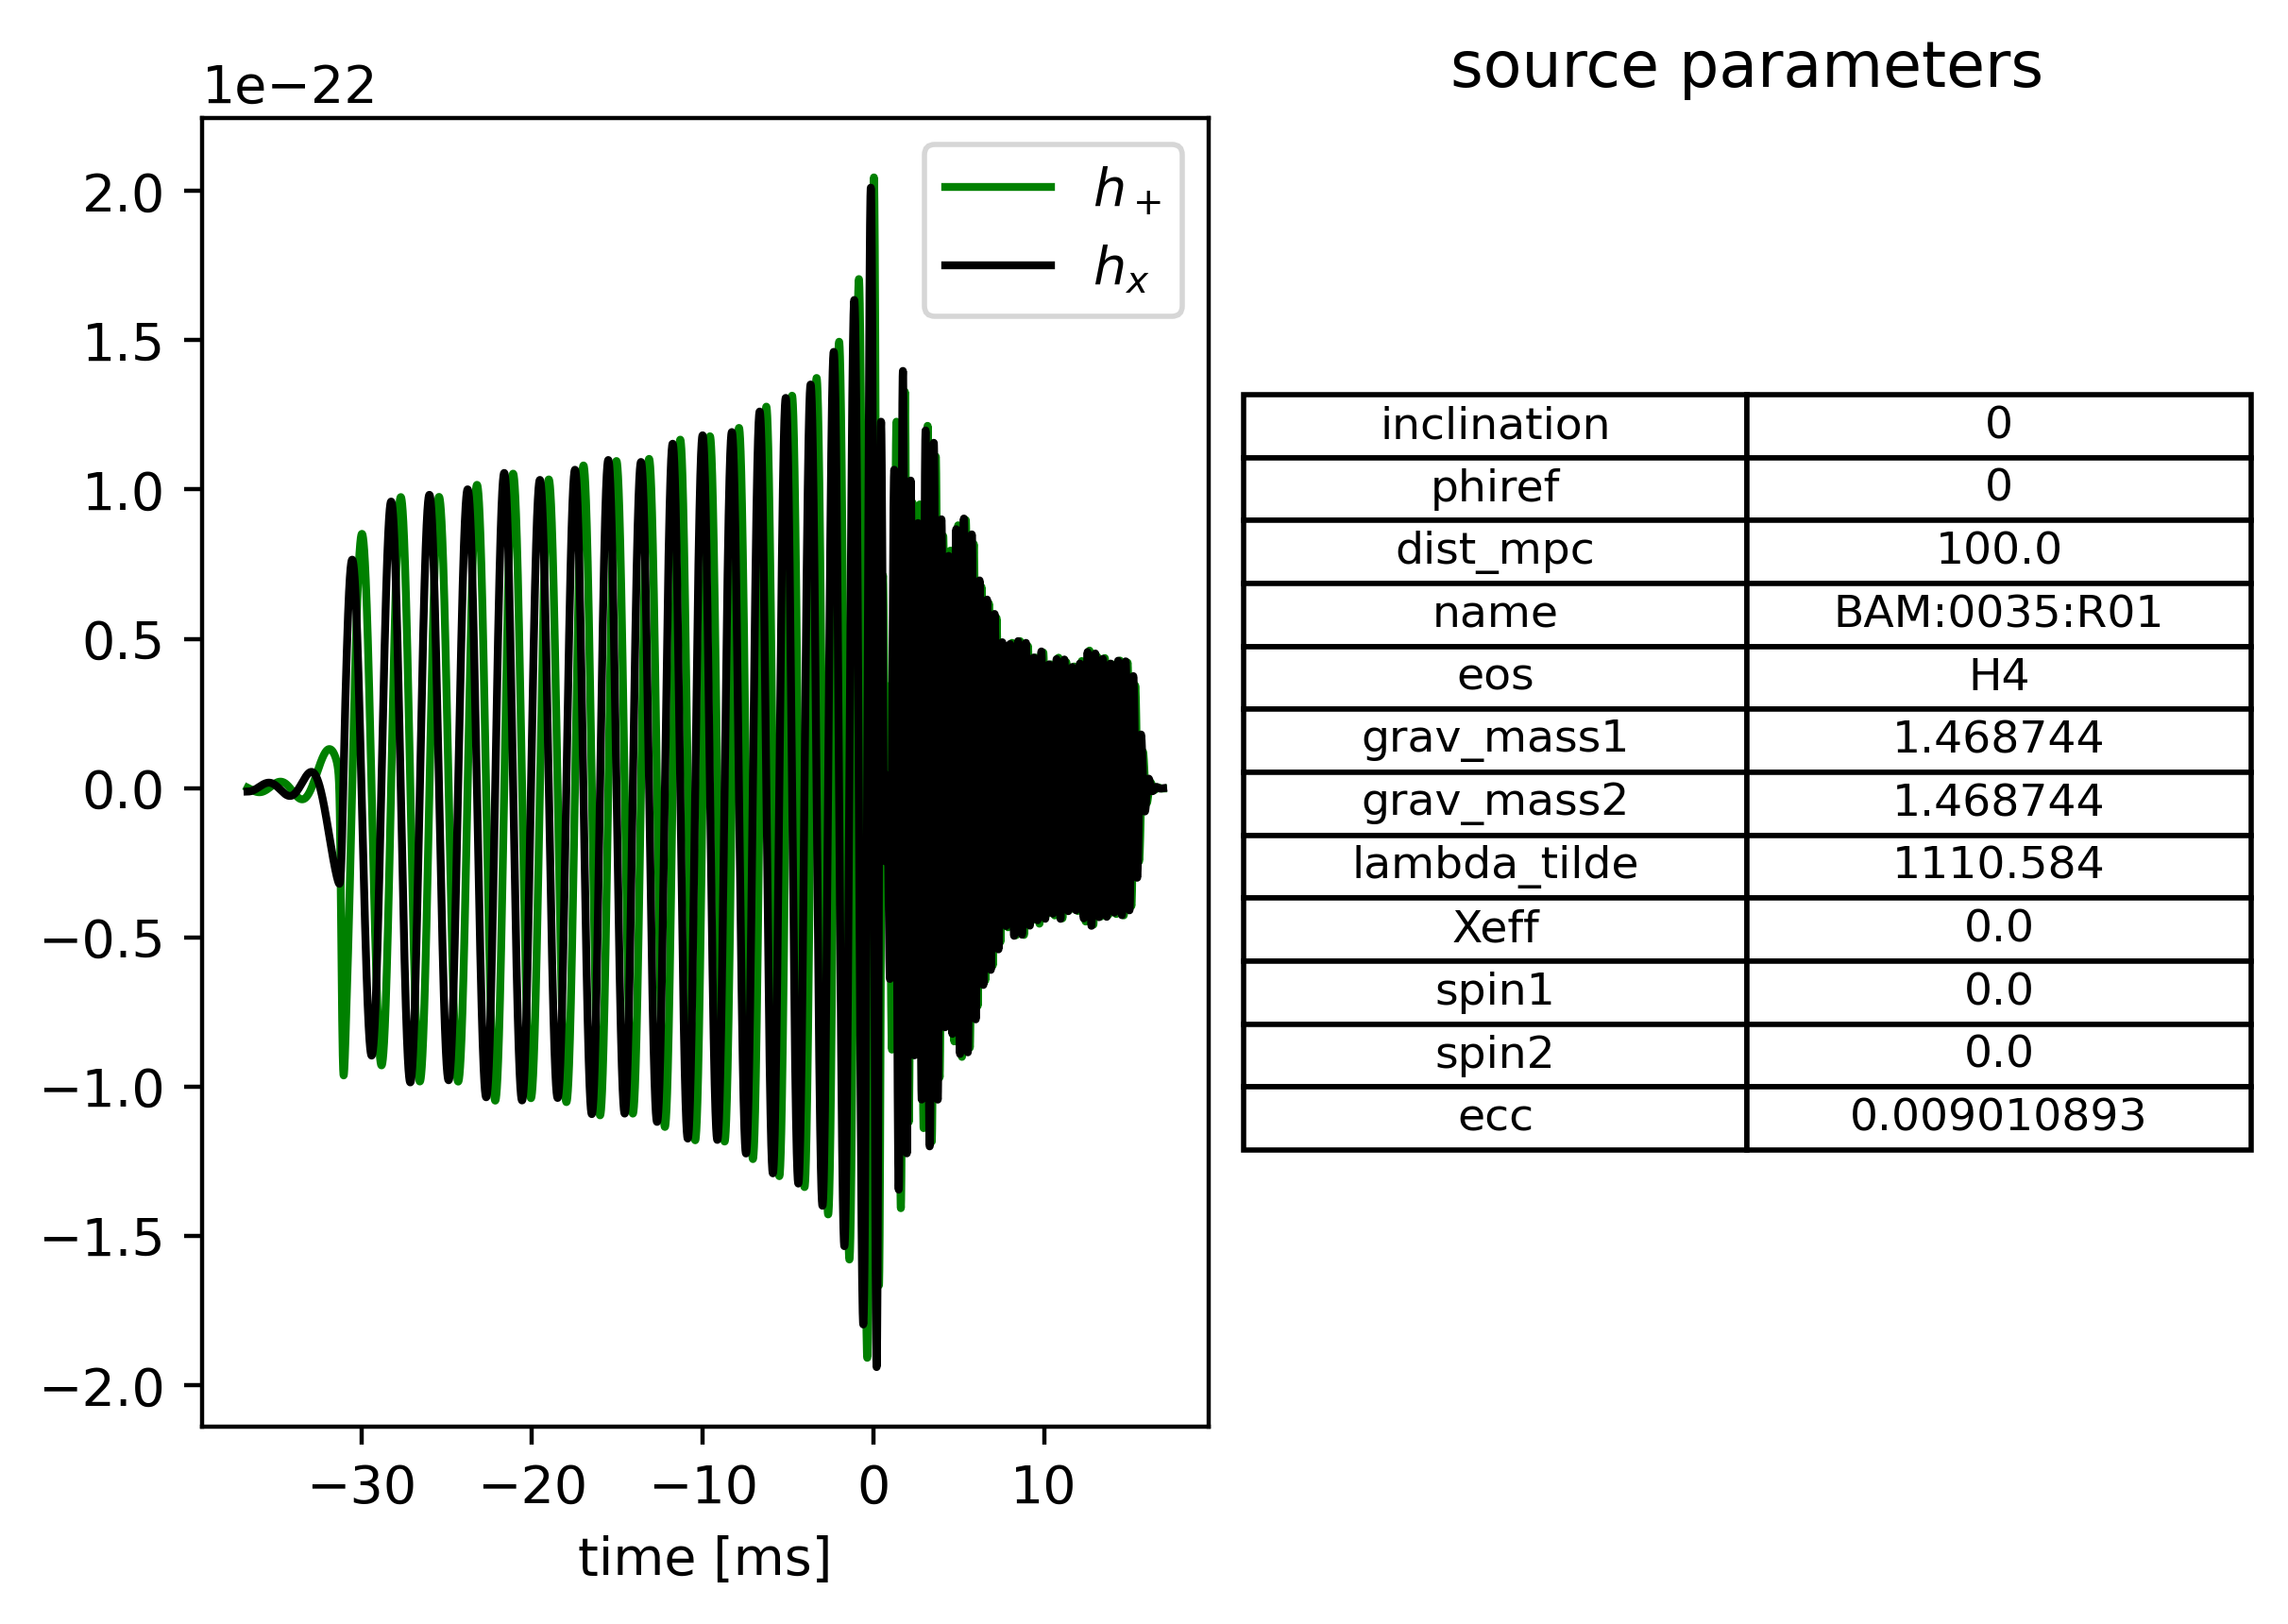

In [3]:
wf = core.CoRe_NR_wf22(db_path_CoRe,'BAM:0035', 
                        src_core, resol='best',
                        sync_db=False)

wf_p0 = ut.find_postm(wf, before=0e-3, after=2e-3, alpha=0.)

wf.show_wf(mdta=True);

# 2. Load the detector sensitivity curve

In [4]:
path_code = '/home/sebastian/REPOS3/sebas-training/thesis/files/design_curves/'
sc0 = ut.ASD('et_d', path_code)
sc1 = ut.white_noise_fd(sc0.fd)

# 3. Build a simple template bank of n=2 dimensions

In [5]:
Nd = 20
Nf = 20
a = 0
f = np.linspace(500, 3500, Nf)
d = np.linspace(0.1e-3, 1.5*wf_p0.dur, Nd)
f_mesh0, d_mesh0 = np.meshgrid(f,d)


templ = lambda f,d,dt,t_0=wf_p0.t_0,amp=1:ut.monochr_templ(f, d, dt, 
                                                   t_0,amp, phase=0,
                                                    alpha=a)

# 4. use the vectorized Matched filter function "genrlzd_SNR1"

In [6]:
twod_pT0 = snr.genrlzd_SNR1(wf_p0.hp_get_tdobj(),templ,sc0,
                           f_mesh0, d_mesh0, N=5000, cut_sc=None,
                           taufix=None, phase_opt=True, cut_pfind=None)

# 5. Plot results, and the best matching template

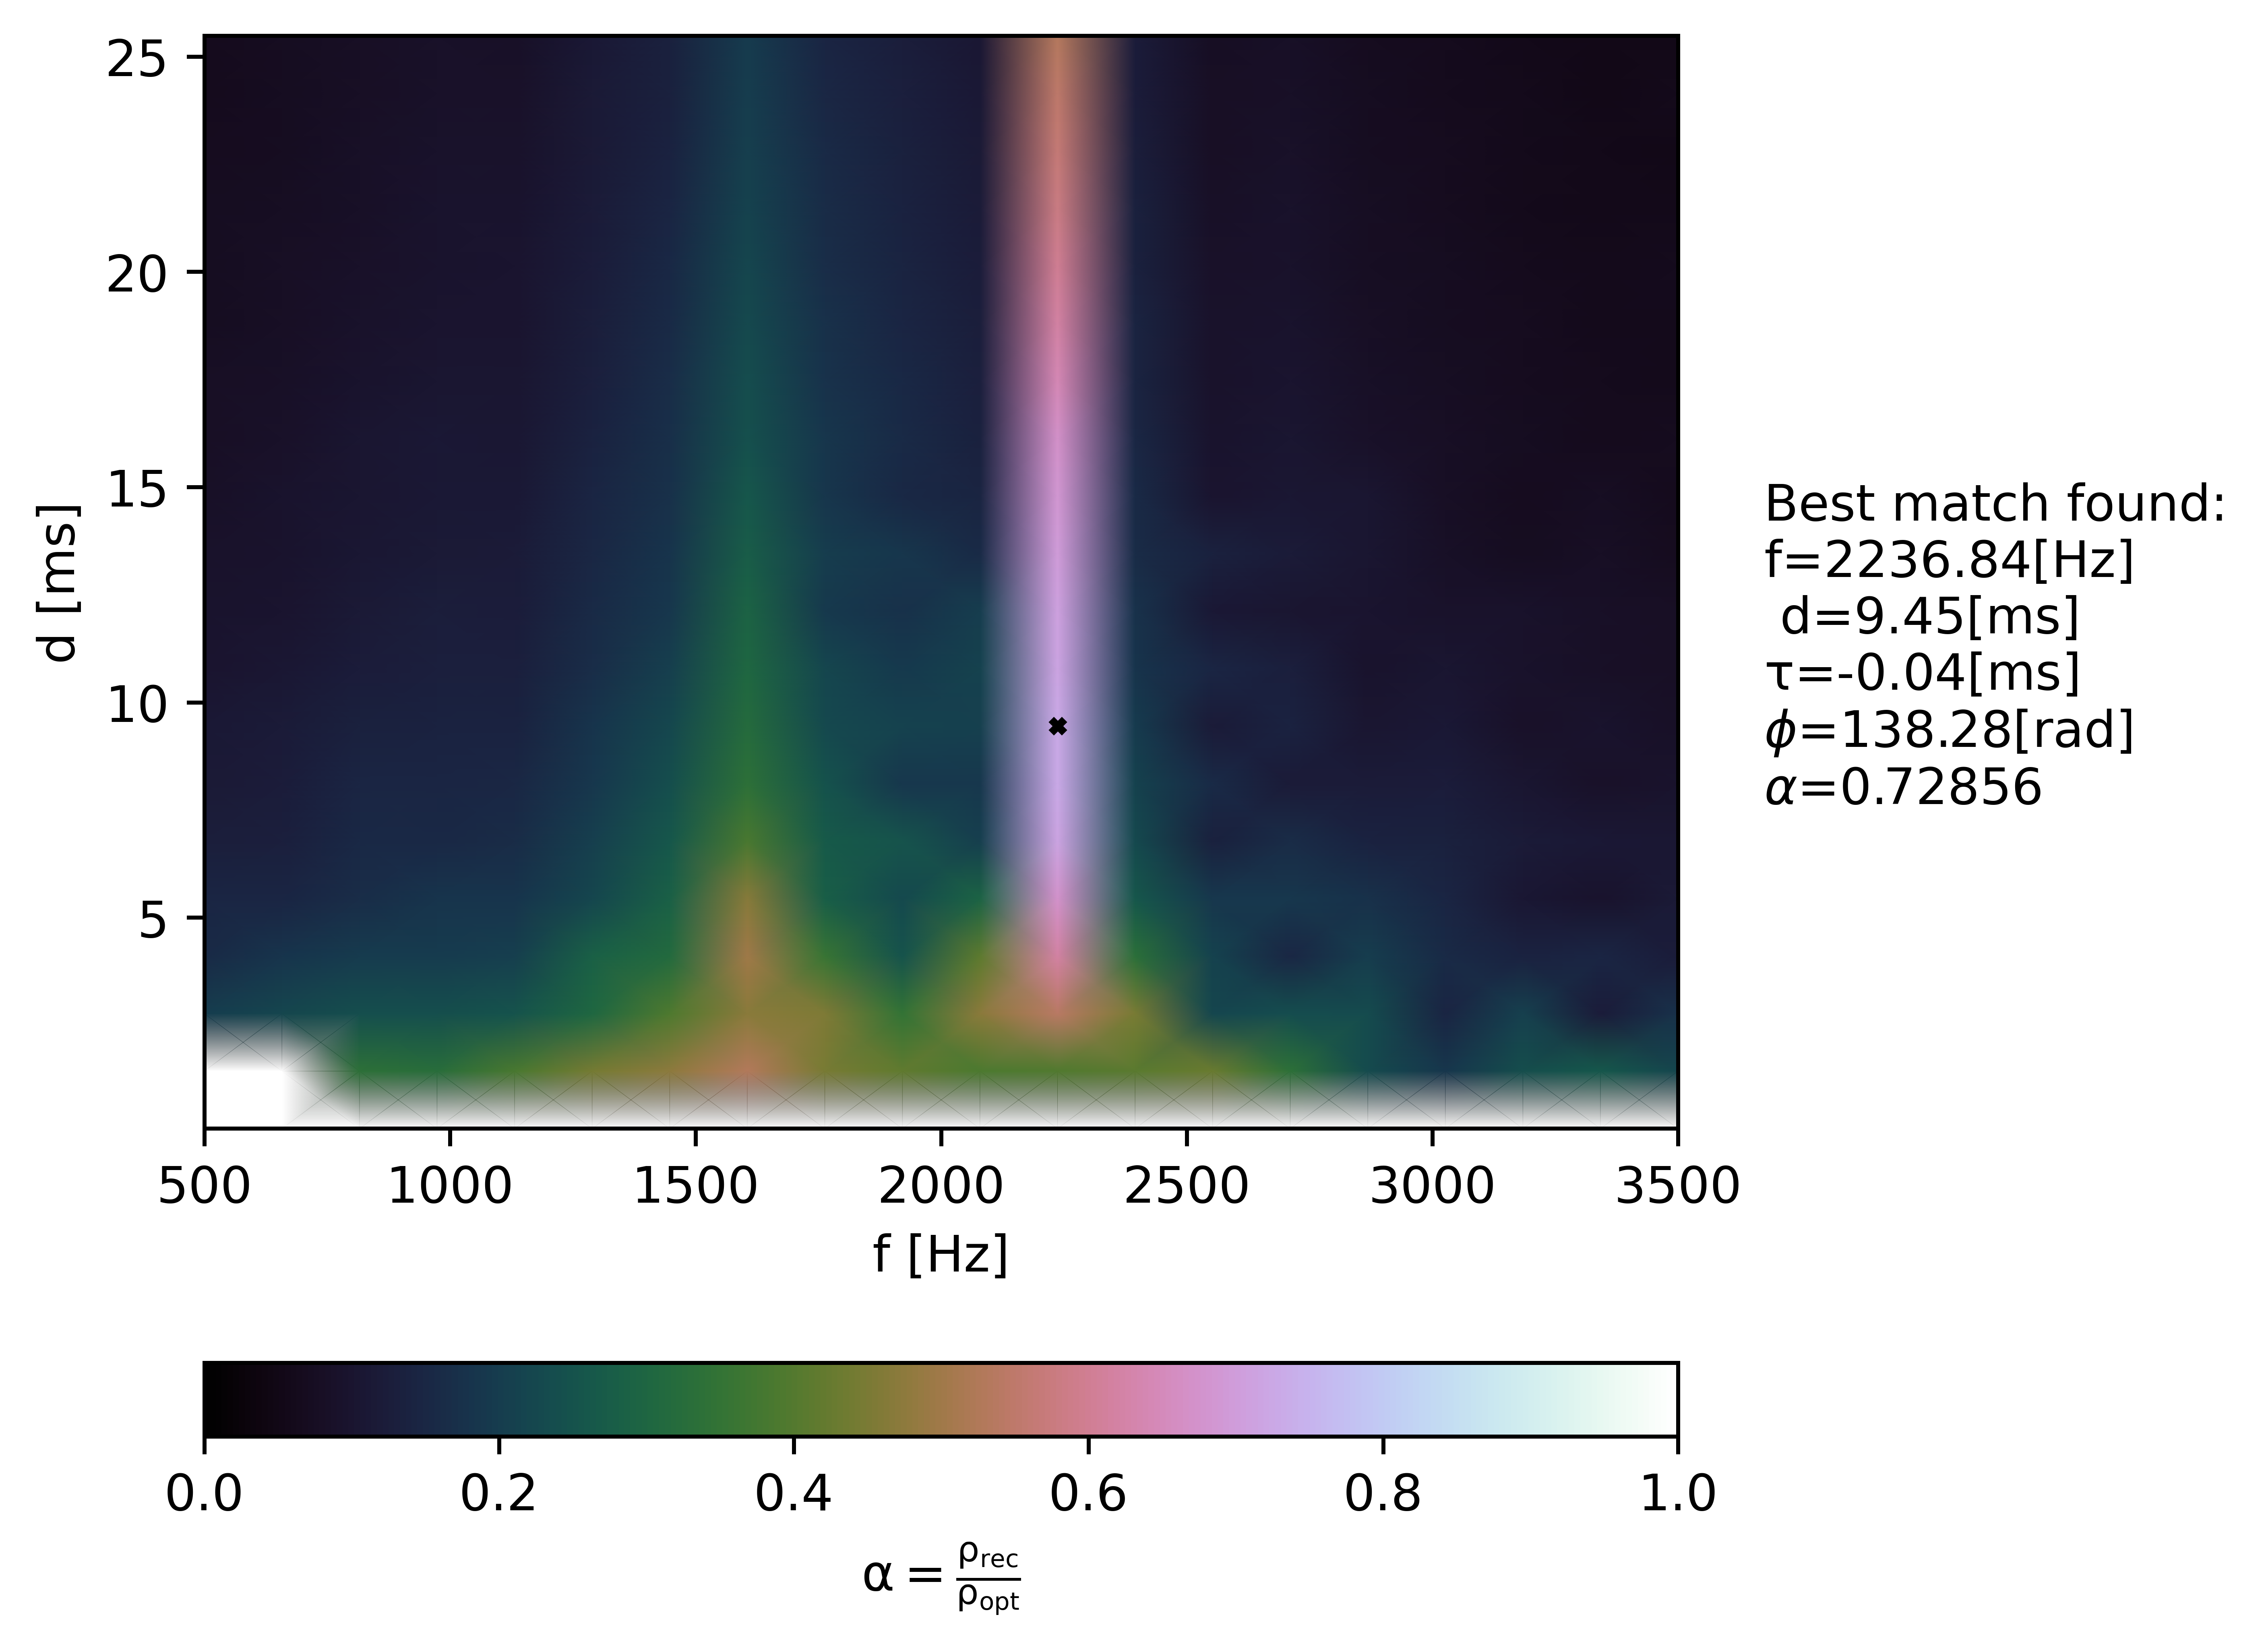

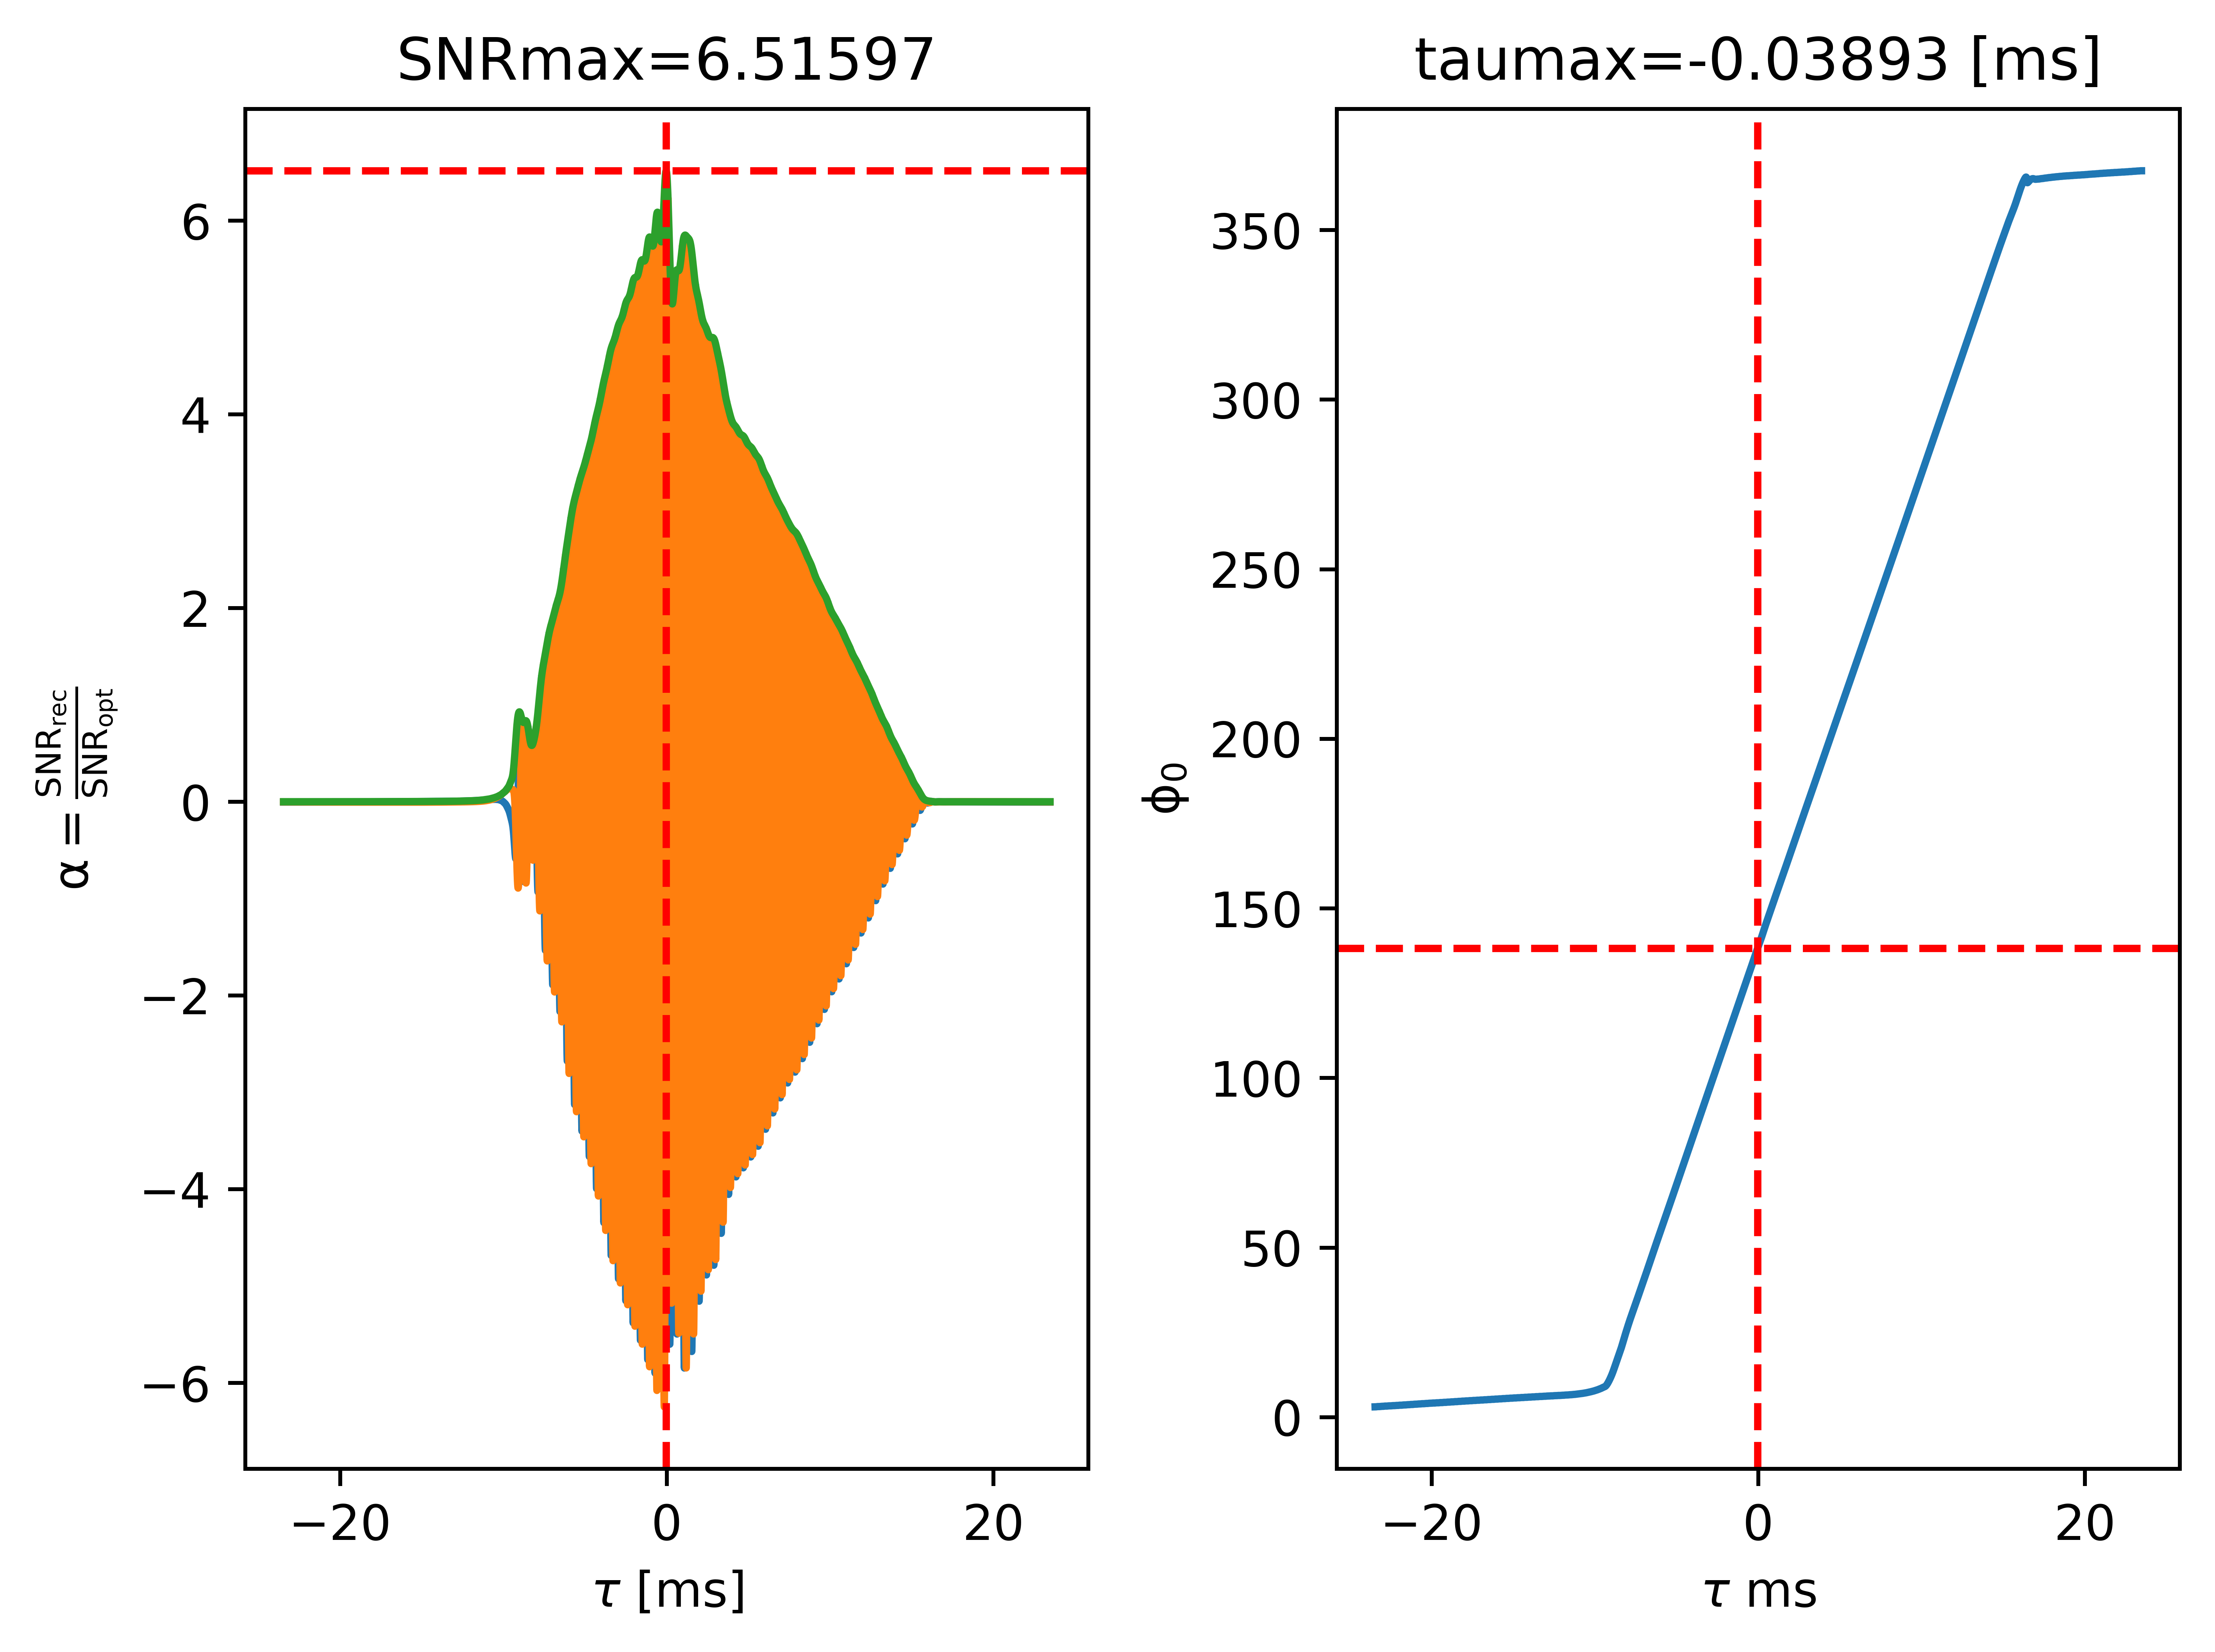

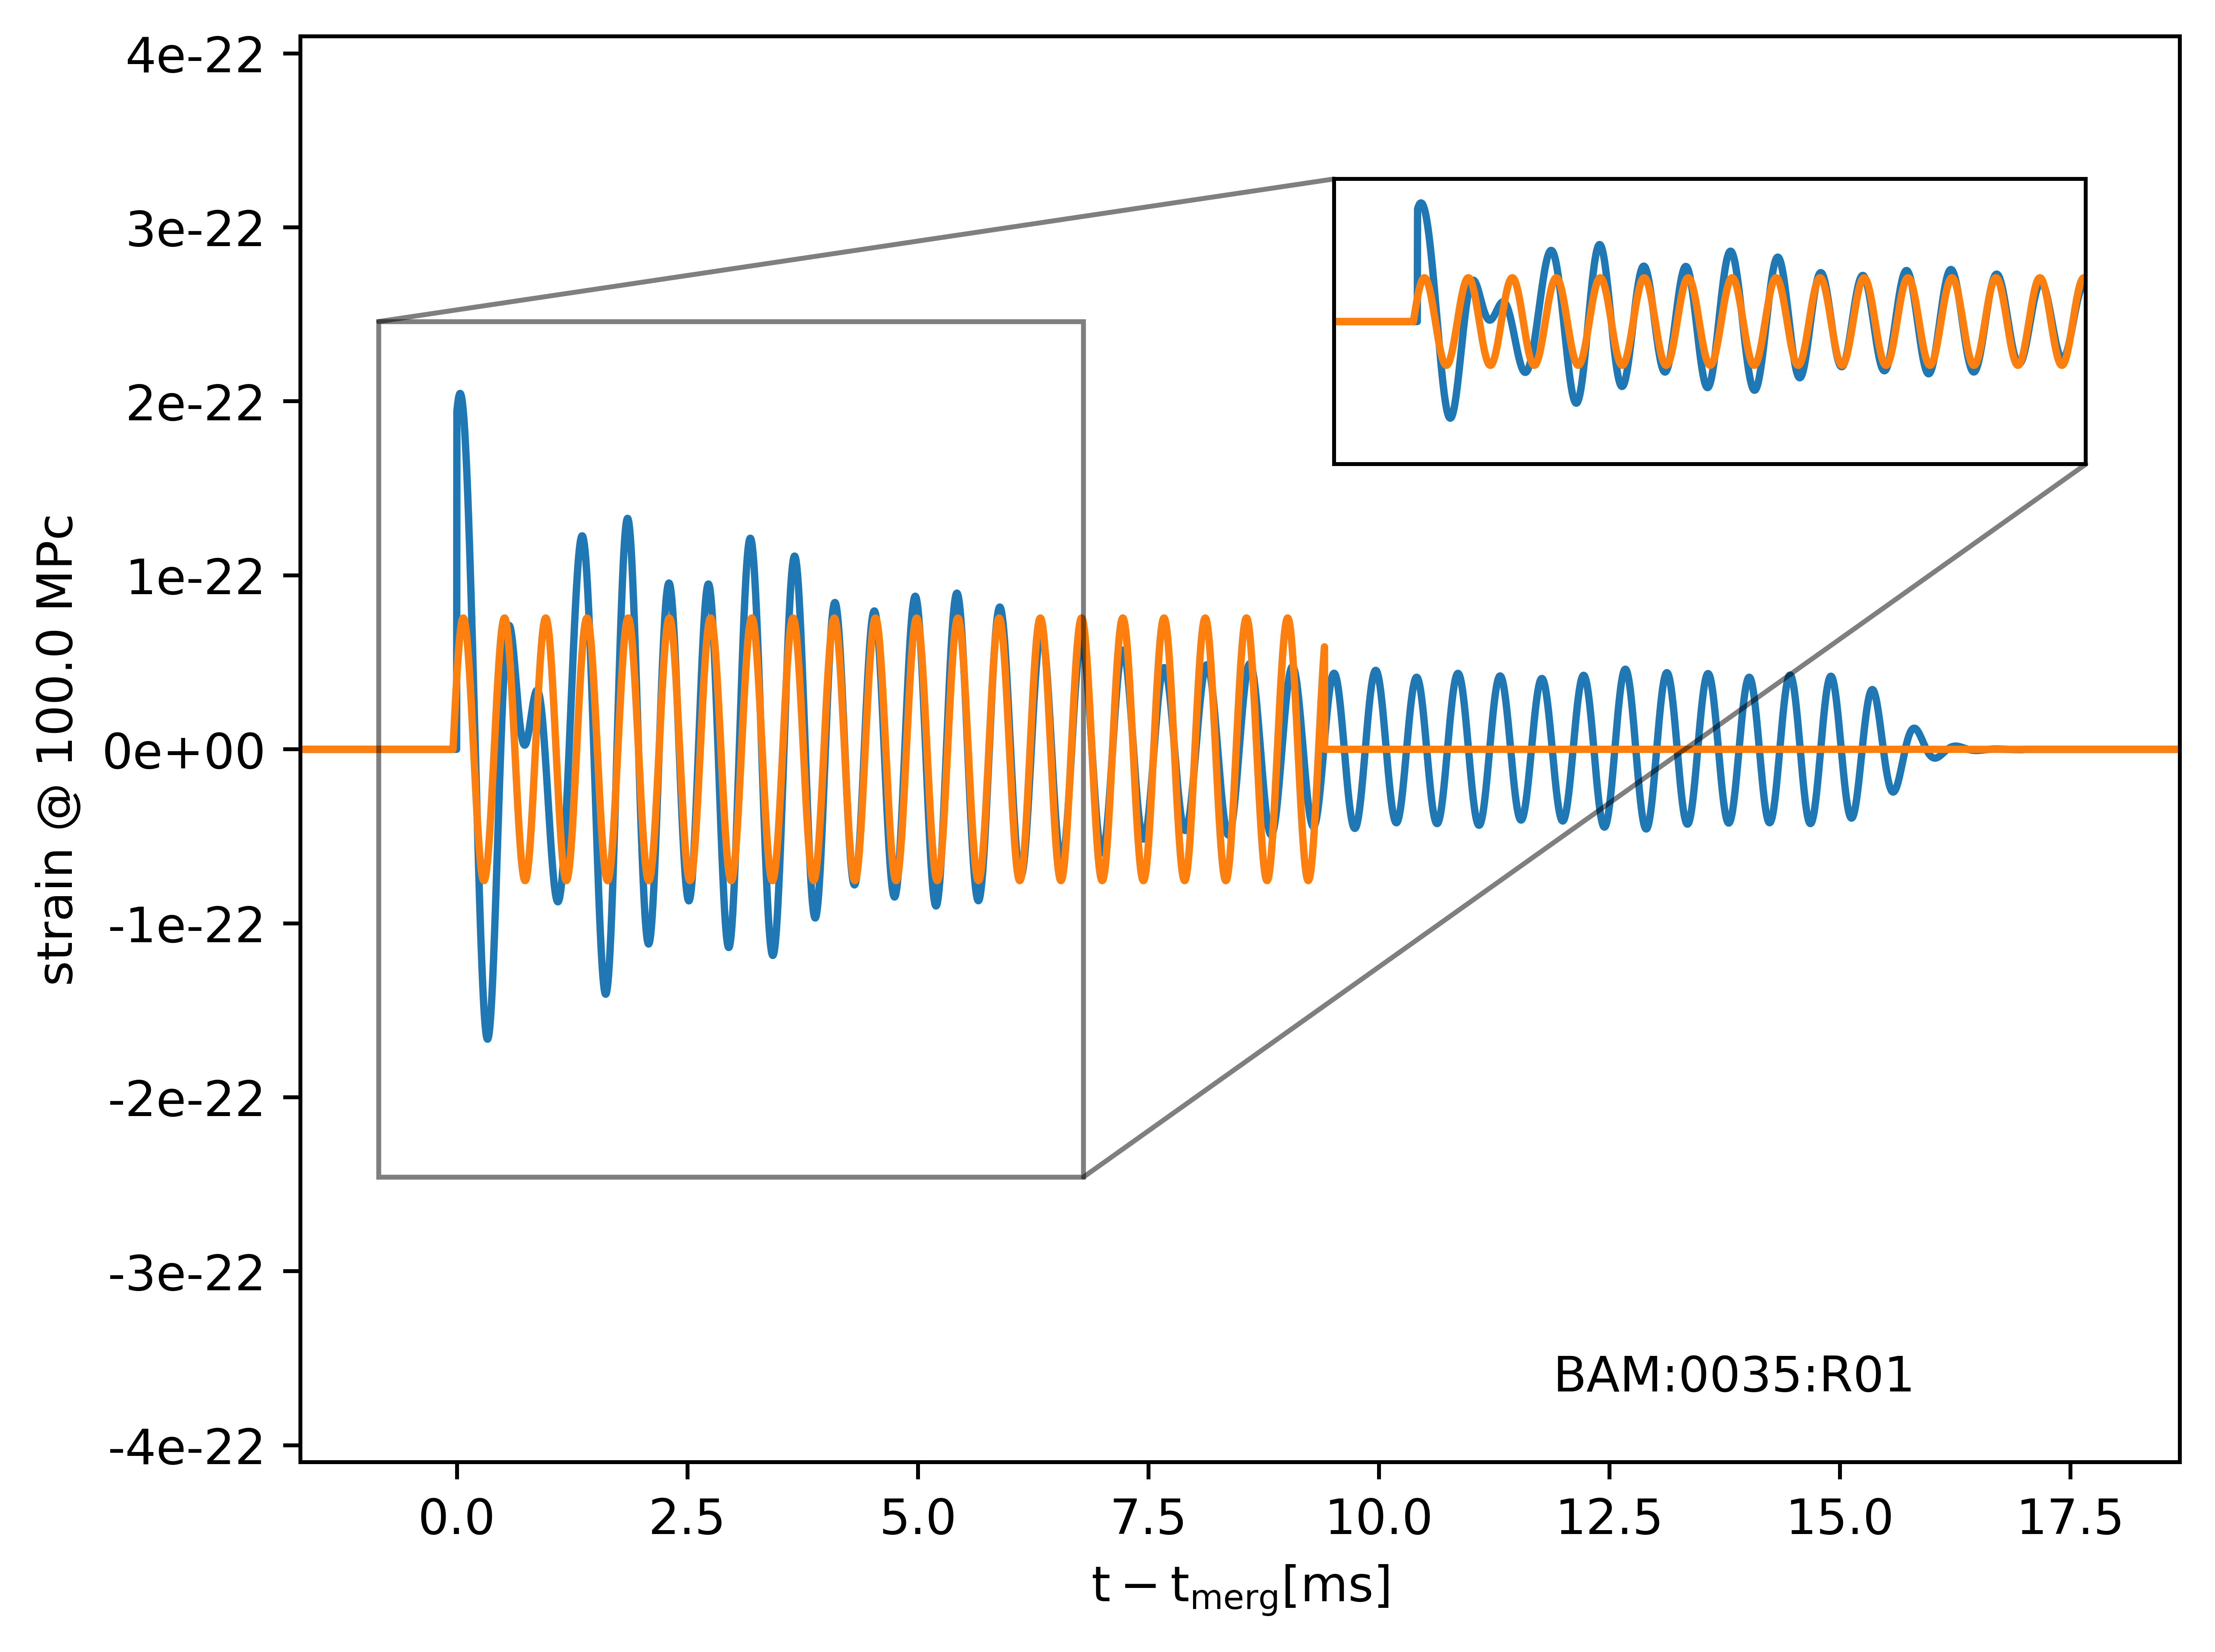

In [7]:
result0 = ut.optimal_template(wf_p0, sc0, twod_pT0,
                 f_mesh0, d_mesh0,1, None,
                 None, 5000, wf.GW_tmax, cut_sc=None,
                 plot=True, alpha=a, phase_opt=True, zoom=0.4)

plt.tight_layout()